# **Pipeline in Machine Learning**

In machine learning, a pipeline is a sequence of data processing steps that are chained together to automate and streamline the machine learning workflow. A pipeline allows you to combine multiple data preprocessing and model training steps into a single object, making it easier to organize and manage your machine learning code.


---
> **Here are the key components of a pipeline:**
---
**`Data Preprocessing Steps:`**
Pipelines typically start with data preprocessing steps, such as feature scaling, feature encoding, handling missing values, or dimensionality reduction. These steps ensure that the data is in the appropriate format and quality for model training.

**`Model Training:`**
After the data preprocessing steps, the pipeline includes the training of a machine learning model. This can be a classifier for classification tasks, a regressor for regression tasks, or any other type of model depending on the problem at hand.

**`Model Evaluation:`**
Once the model is trained, the pipeline often incorporates steps for evaluating its performance. This may involve metrics calculation, cross-validation, or any other evaluation technique to assess the model's effectiveness.

**`Predictions:`**
After the model has been evaluated, the pipeline allows you to make predictions on new, unseen data using the trained model. This step applies the same preprocessing steps used during training to the new data before generating predictions.




---
> **The main advantages of using pipelines in machine learning are:**
---

**`Simplified Workflow:`** Pipelines provide a clean and organized structure for defining and managing the sequence of steps involved in machine learning tasks. This makes it easier to understand, modify, and reproduce the workflow.

**`Avoiding Data Leakage:`** Pipelines ensure that data preprocessing steps are applied consistently to both the training and testing data, preventing data leakage that could lead to biased or incorrect results.

**`Streamlined Model Deployment:`** Pipelines allow you to encapsulate the entire workflow, including data preprocessing and model training, into a single object. This simplifies the deployment of your machine learning model, as the same pipeline can be applied to new data without the need to reapply each individual step.

**`Hyperparameter Tuning:`** Pipelines can be combined with techniques like grid search or randomized search for hyperparameter tuning. This allows you to efficiently explore different combinations of hyperparameters for your models.

----

**Summary:**


Overall, pipelines are a powerful tool for managing and automating the machine learning workflow, promoting code reusability, consistency, and efficiency. They help streamline the development and deployment of machine learning models, making it easier to iterate and experiment with different approaches.

### Let's work on the titanic dataset and use the pipelines...

In [24]:
# importing the lirbraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
# importing the dataset:

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# select the features and the target:

X = df[['pclass', 'sex', 'fare', 'age', 'embarked']]
y = df['survived']

In [11]:
# split the dataset into training and testing:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.7877094972067039
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

confusion_matrix [[87 18]
 [20 54]]


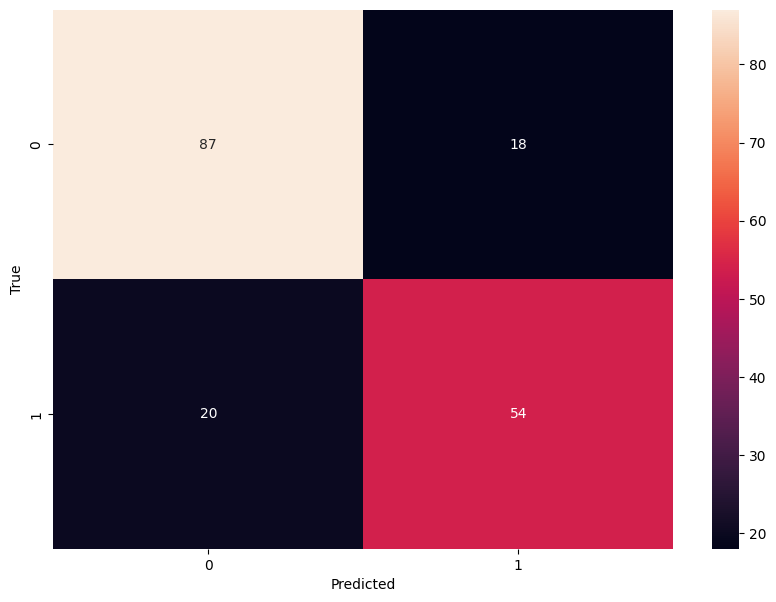

In [17]:
# create a column transformer for the preprocessing:

# seperating the Numerical and Categorical features:
numerical_features = ['fare', 'age']
categorical_features = ['pclass', 'sex', 'embarked']


# seperating the numerical and categorical transformers:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# creating the column transformer:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# create a pipeline for the model:

PipeLine = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# fit the model:

PipeLine.fit(X_train, y_train)

# make predictions:

y_pred = PipeLine.predict(X_test)

# Check the accuracy and the classification report:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---
**Explaination:**

In this example, we start by loading the Titanic dataset from Seaborn using sns.load_dataset('titanic'). We then select the relevant features and target variable (survived) to train our model. Next, we split the data into training and test sets using train_test_split from scikit-learn.

The pipeline is created using the Pipeline class from scikit-learn. It consists of three steps:

Data preprocessing step: The SimpleImputer is used to handle missing values by replacing them with the most frequent value in each column.

Feature encoding step: The OneHotEncoder is used to encode categorical variables (`sex and embarked`) as binary features.

Model training step: The RandomForestClassifier is used as the machine learning model for classification.

We then fit the pipeline on the training data using pipeline.fit(X_train, y_train). Afterward, we make predictions on the test data using pipeline.predict(`X_test`).

Finally, we calculate the accuracy score by comparing the predicted values (`y_pred`) with the actual values (`y_test`).

Note that you may need to install Seaborn (`pip install seaborn`) if it's not already installed in your environment.

---

### let's try the same piple with other models:
`Decision Tree Classifier`

Accuracy: 0.7597765363128491
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.73      0.72        74

    accuracy                           0.76       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.76      0.76      0.76       179

confusion_matrix [[82 23]
 [20 54]]


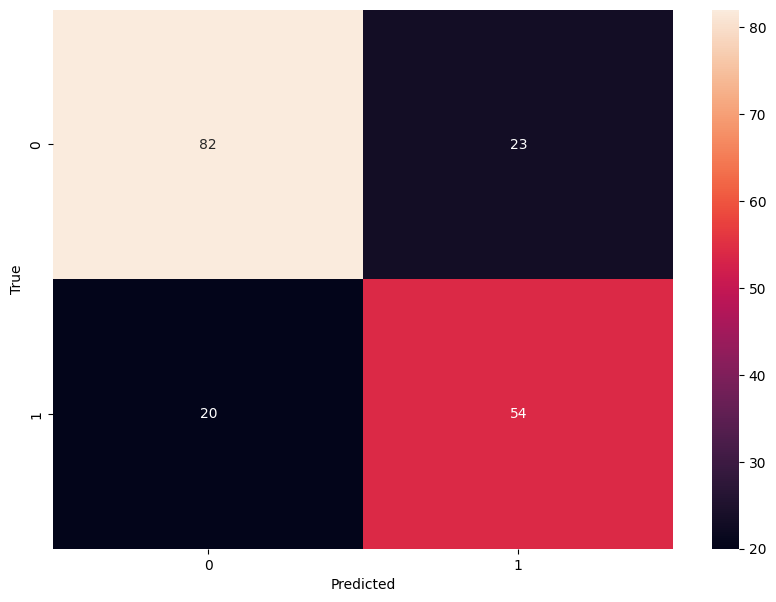

In [22]:

# create a column transformer for the preprocessing:

# seperating the Numerical and Categorical features:
numerical_features = ['fare', 'age']
categorical_features = ['pclass', 'sex', 'embarked']


# seperating the numerical and categorical transformers:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# creating the column transformer:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# create a pipeline for the model:

PipeLine = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', (random_state=42))
])

# fit the model:

PipeLine.fit(X_train, y_train)

# make predictions:

y_pred = PipeLine.predict(X_test)

# Check the accuracy and the classification report:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy: 0.6536312849162011
Classification Report:               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179

confusion_matrix [[99  6]
 [56 18]]


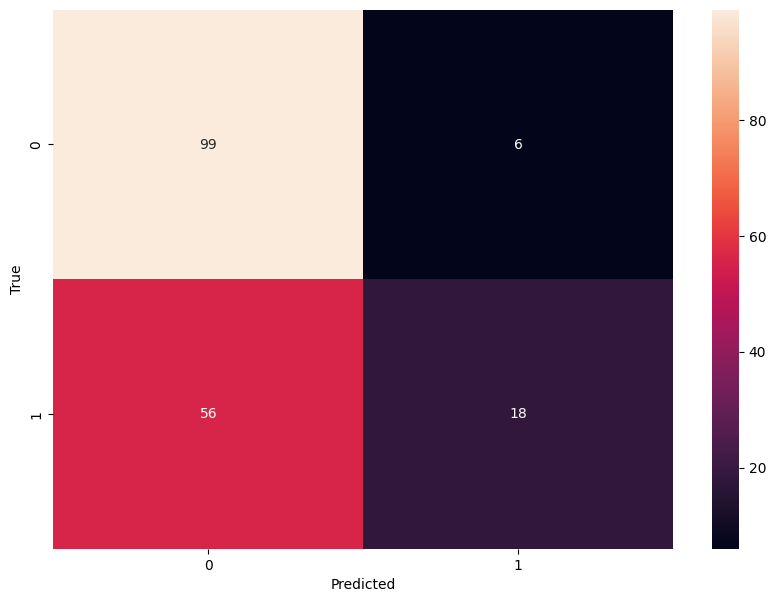

In [25]:

# create a column transformer for the preprocessing:

# seperating the Numerical and Categorical features:
numerical_features = ['fare', 'age']
categorical_features = ['pclass', 'sex', 'embarked']


# seperating the numerical and categorical transformers:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# creating the column transformer:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# create a pipeline for the model:

PipeLine = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(random_state=42))
])

# fit the model:

PipeLine.fit(X_train, y_train)

# make predictions:

y_pred = PipeLine.predict(X_test)

# Check the accuracy and the classification report:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


c:\Users\Muhammad Faizan\.conda\envs\python_machinelearning\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7932960893854749
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179

confusion_matrix [[88 17]
 [20 54]]


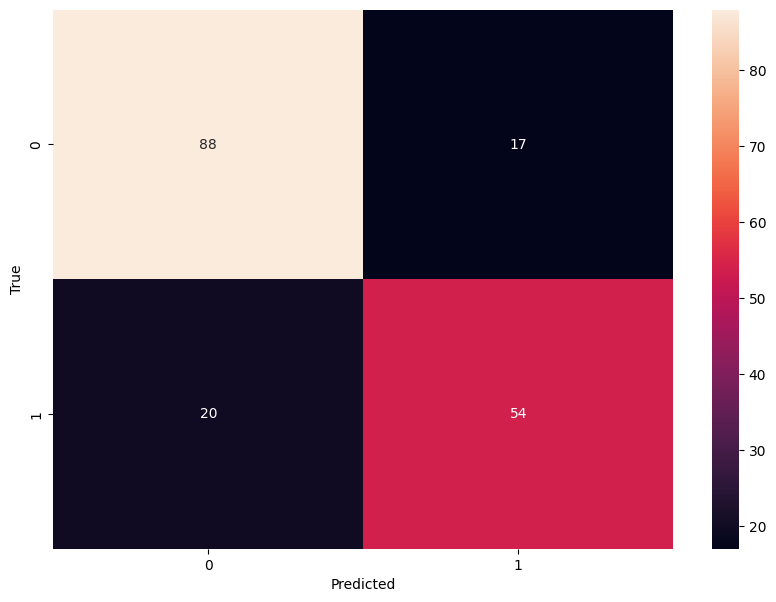

In [26]:

# create a column transformer for the preprocessing:

# seperating the Numerical and Categorical features:
numerical_features = ['fare', 'age']
categorical_features = ['pclass', 'sex', 'embarked']


# seperating the numerical and categorical transformers:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# creating the column transformer:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
])

# create a pipeline for the model:

PipeLine = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=42))
])

# fit the model:

PipeLine.fit(X_train, y_train)

# make predictions:

y_pred = PipeLine.predict(X_test)

# Check the accuracy and the classification report:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


---

## Let's try making pipeline for performing hyperparameter tuning:

---

`Hyperparameter tuning` in a pipeline involves optimizing the hyperparameters of the different steps in the pipeline to find the best combination that maximizes the model's performance. Here's an example of hyperparameter tuning in a pipeline and selecting the best model on the Titanic dataset:

In [31]:
# importing the lirbraries:

import pandas as pd
import seaborn as sns

# Preprocessing:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models:
from sklearn.ensemble import RandomForestClassifier

# Metrics:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy: 0.8212290502793296
Classification Report:               precision    recall  f1-score   support

           0       0.80      0.92      0.86       105
           1       0.86      0.68      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179

confusion_matrix [[97  8]
 [24 50]]


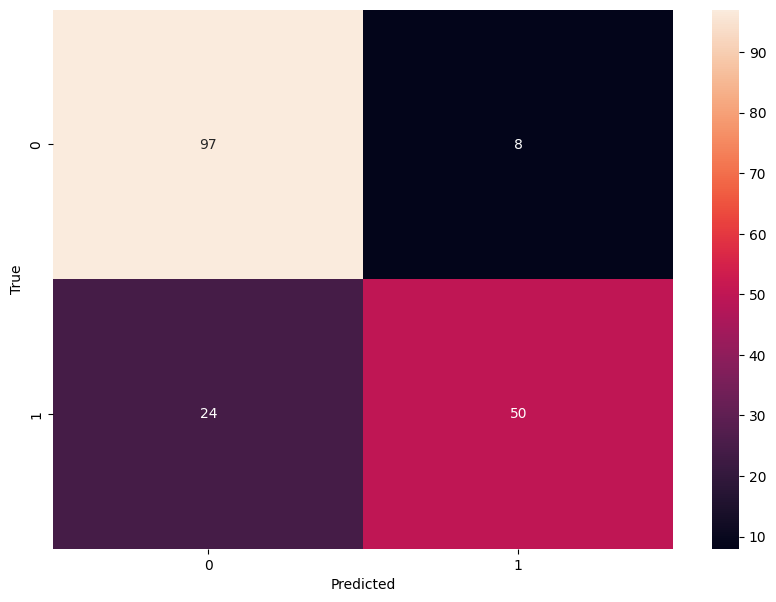

In [34]:
# load the data:

df = sns.load_dataset('titanic')

# select the features and the target:

X = df[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = df['survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    ('model', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters to tune
hyperparameters = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [None, 5, 10, 30],
    'model__min_samples_split': [2, 5, 10, 15]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# make predictions:

y_pred = best_model.predict(X_test)

# Check the accuracy and the classification report:

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('confusion_matrix', confusion_matrix(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Selecting best model in Pipeline**

To select the best model when using multiple models in a pipeline, you can use techniques like cross-validation and evaluation metrics to compare their performance. Here's an example of how to accomplish this on the Titanic dataset:

In [35]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load the Titanic dataset from Seaborn
titanic_data = sns.load_dataset('titanic')

# Select features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = titanic_data['survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 0.7991529597163399
Test Accuracy: 0.8379888268156425

Model: Gradient Boosting
Cross-validation Accuracy: 0.8061952132374668
Test Accuracy: 0.7988826815642458

Best Model: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', RandomForestClassifier(random_state=42))])


---
we initialize the best_model and best_accuracy variables to track the best-performing model.

During the iteration over the models, after calculating the accuracy score for each model, we compare it with the current best_accuracy value. If the current model has a higher accuracy, we update best_accuracy and assign the pipeline object to best_model.

After the loop, we print the best model using print("Best Model:", best_model).

By comparing the accuracy scores of different models within the pipeline and selecting the one with the highest accuracy, you can retrieve the best-performing model for the given dataset.

---

In [36]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Titanic dataset from Seaborn
titanic_data = sns.load_dataset('titanic')

# Select features and target variable
X = titanic_data[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = titanic_data['survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42))
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)


Model: Random Forest
Cross-validation Accuracy: 0.7991529597163399
Test Accuracy: 0.8379888268156425

Model: Gradient Boosting
Cross-validation Accuracy: 0.8061952132374668
Test Accuracy: 0.7988826815642458

Model: Support Vector Machine
Cross-validation Accuracy: 0.8160248202501723
Test Accuracy: 0.8044692737430168

Model: Logistic Regression
Cross-validation Accuracy: 0.7977839062346105
Test Accuracy: 0.8100558659217877

Best Model: Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore')),
                ('model', RandomForestClassifier(random_state=42))])
